In [89]:
## Loading packages
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sklearn

from sklearn import linear_model
from sklearn import preprocessing
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
## Subtask 1:  Data Preparation

np.random.seed(122)

# Loading data
dataRaw = sklearn.datasets.fetch_california_housing()

X = dataRaw['data']
Y = dataRaw['target']

#print(X.shape)
#print(Y.shape)

# Getting feature names of the data
featureNames = dataRaw['feature_names']
print('Independent features are: ', featureNames)

targetNames = dataRaw['target_names']
print('Target feature of dataset: ', targetNames)

# Shuffling array 
X, Y = shuffle(X, Y, random_state=1)

# Splitting data to training and test set

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size = 0.3)


# Test and 
print('Samples in training data: ', x_train.shape[0])
print('Samples in test data: ', x_test.shape[0])
#print(y_train.shape)
#print(y_test.shape)



In [ ]:
## Subtask 2:  Regression Using scikit-learn

lrSKL = linear_model.LinearRegression(fit_intercept = False)
lrSKL.fit(x_train, y_train)

y_hat_trainSKL = lrSKL.predict(x_train)
y_hat_testSKL = lrSKL.predict(x_test)


testMSE_SKL = metrics.mean_squared_error(y_test, y_hat_testSKL, squared=True)
trainMSE_SKL = metrics.mean_squared_error(y_train, y_hat_trainSKL, squared=True)

print('scikit-learn\'s regression mean squared error on training data: ', trainMSE_SKL)
print('scikit-learn\'s regression mean squared error on test data: ', testMSE_SKL)

#print(lrSKL.coef_)
#print(lrSKL.coef_.shape)

In [ ]:
## Subtask 3:  Implement Linear Regression on Your Own I

CovarianceMatrix = np.dot(x_train.T, x_train)
closedFormW = np.dot(np.linalg.inv(CovarianceMatrix), np.dot(x_train.T, y_train))

print('Weight vector of clsoed form solution: ', closedFormW)

y_hat_trainClosedForm  = np.sum(np.multiply(closedFormW.T, x_train),axis=1)
y_hat_testClosedForm = np.sum(np.multiply(closedFormW.T, x_test),axis=1)

testMSE_closedForm = np.mean((y_test - y_hat_testClosedForm)**2)
trainMSE_closedForm = np.mean((y_train - y_hat_trainClosedForm)**2)

print('closed-form\'s regression mean squared error on train data: ', trainMSE_closedForm)
print('closed-form\'s regression mean squared error on test data: ', testMSE_closedForm)

In [ ]:
## Subtask 4:  Implement Least Squares Linear Regression on Your Own II
## Abandoned try

"""
def GD(X, Y, X_test, Y_test, numIterations = 1000):
    
    ## Initialize variables 
    losses = []
    MSEs = []
    MSEs_test = []
    Ws = []
    w = np.zeros(X.shape[1])
    n = X.shape[0]
    
    ## MSE before first iteration
    k = [0]
    MSEs.append(np.mean((Y - np.dot(X, w))**2))
    MSEs_test.append(np.mean((Y_test - np.dot(X_test, w))**2))
    Ws.append(w)
    
    for t in range(numIterations):
        
        lr = (10e-6) / (1 + t + 1) ## because iterator starts from zero
        print(lr)
                       
        y_hat = np.dot(X, w)
        loss =  Y - y_hat
        mse = np.mean((Y - y_hat)**2)  
        
        ## Update gradient; based on slides
        gradient = np.dot(X.T, loss) * (-2/n)        
        
        ## Update weight vector
        w = w - lr*gradient    
        
        
        if(t % 1000 == 0):
            losses.append(loss)
            MSEs.append(mse)
            MSEs_test.append(np.mean((Y_test - np.dot(X_test, w))**2))
            Ws.append(w)
            k.append(k[-1] + 1)

        
    return losses, MSEs, MSEs_test, Ws, k
    
    
trainLosses, trainMSEs, testMSEs, trainWs, k = GD(x_train, y_train, x_test, y_test, numIterations = 100000)  


plt.figure(figsize=(12,8))
plt.plot(k, trainMSEs, '*', c = 'b', label = 'MSE by iteration')

plt.xlabel('k')
plt.ylabel('$MSE$')
plt.xlim((0, 100))
plt.ylim((0,6))
plt.legend()
"""



In [ ]:
## Subtask 4:  Implement Least Squares Linear Regression on Your Own II

def GD1(X, Y, X_test, Y_test, numIterations = 1000):
    
    ## Initialize variables 
    losses = []
    MSEs = []
    MSEs_test = []
    
    Ws = []
    w = np.zeros(X.shape[1])
    n = X.shape[0]
    
    ## Before initial gradient descent step
    k = [0]
    MSEs.append(np.mean((Y - np.dot(X, w))**2))
    Ws.append(w)
    MSEs_test.append(np.mean((Y_test - np.dot(X_test, w))**2))
    TwoLastMSEs = []
    TwoLastMSEs.append(np.mean((Y - np.dot(X, w))**2))
    
    ## Updating_gradient
    for t in range(1, (numIterations+1)):
        
        ## Updating learning rate
        lr = (10e-6) / (1 + t)

        
        ## Upgrading weight vector
        y_hat = np.dot(X, w)
        loss =  Y - y_hat
        gradient = np.dot(X.T, loss) * (-2/n)        
        w = w - lr*gradient
        
        # Calculating errors
        mse = np.mean((Y - y_hat)**2)
        mse_test = np.mean((Y_test - np.dot(X_test, w))**2)        
        
        if(t % 1000 == 0):
            losses.append(loss)
            MSEs.append(mse)
            MSEs_test.append(mse_test)
            #print(Y_test.shape)
            Ws.append(w)
            k.append(k[-1] + 1)

    return losses, MSEs, MSEs_test, Ws, k
    
    

    
trainLosses, trainMSEs, testMSEs, trainWs, k = GD1(x_train, y_train, x_test, y_test, numIterations = 100000)  


plt.figure(figsize=(12,8))
plt.plot(k, trainMSEs, '*', c = 'b', label = 'MSE by iteration at k * 1000 - training sample')
plt.plot(k, testMSEs, '.', c = 'r', label = 'MSE by iteration at k * 1000 - test sample')


plt.xlabel('k * 1000 $th$ iteration')
plt.ylabel('$MSE$')
plt.xlim((0, 100))
plt.ylim((0,6))
plt.title('Default learning rate update scheduler')
plt.legend()

print('Default gradient descent\'s regression mean squared error on train data: ', trainMSEs[-1])
print('Default gradient descent\'s regression mean squared error on test data: ', testMSEs[-1])

In [ ]:
## Subtask 5:  Implement Least Squares Linear Regression on Your Own III
def GD2(X, Y, X_test, Y_test, numIterations = 1000):
    
    ## Initialize variables 
    losses = []
    MSEs = []
    MSEs_test = []
    
    Ws = []
    w = np.zeros(X.shape[1])
    n = X.shape[0]
    
    ## Before initial gradient descent step
    k = [0]
    MSEs.append(np.mean((Y - np.dot(X, w))**2))
    Ws.append(w)
    MSEs_test.append(np.mean((Y_test - np.dot(X_test, w))**2))
    lr = (10e-8)
    TwoLastMSEs = []
    TwoLastMSEs.append(np.mean((Y - np.dot(X, w))**2))
    
    ## Updating_gradient
    for t in range(1, (numIterations+1)):
        
        ## Updating learning rate

        if (t != 1):
            if(TwoLastMSEs[1] < TwoLastMSEs[0]):
                lr = lr * 1.1

            elif(TwoLastMSEs[1] >= TwoLastMSEs[0]):
                    lr = lr / 2

                       
        ## Upgrading weight vector
        y_hat = np.dot(X, w)
        loss =  Y - y_hat
        gradient = np.dot(X.T, loss) * (-2/n)        
        w = w - lr*gradient
        
        # Calculating errors
        mse = np.mean((Y - y_hat)**2)
        mse_test = np.mean((Y_test - np.dot(X_test, w))**2)                  
        
        if(t == 1):
            TwoLastMSEs.append(mse)
        if (t != 1):
            TwoLastMSEs.pop(0)
            TwoLastMSEs.append(mse)
        
        
        if(t % 1000 == 0):
            losses.append(loss)
            MSEs.append(mse)
            MSEs_test.append(mse_test)
            Ws.append(w)
            k.append(k[-1] + 1)

    return losses, MSEs, MSEs_test, Ws, k
    
    

    
trainLosses, trainMSEs, testMSEs, trainWs, k = GD2(x_train, y_train, x_test, y_test, numIterations = 100000)  


plt.figure(figsize=(12,8))
plt.plot(k, trainMSEs, '*', c = 'b', label = 'MSE by iteration at k * 1000 - training sample')
plt.plot(k, testMSEs, '.', c = 'r', label = 'MSE by iteration at k * 1000 - test sample')


plt.xlabel('k * 1000 $th$ iteration')
plt.ylabel('$MSE$')
plt.xlim((0, 100))
plt.ylim((0,6))
plt.title('Bold driver learning rate update scheduler')
plt.legend()

print('Bold driver like gradient descent\'s regression mean squared error on train data: ', trainMSEs[-1])
print('Bold driver like  gradient descent\'s regression mean squared error on test data: ', testMSEs[-1])

In [ ]:
## Subtask 6:  Implement Least Squares Linear Regression on Your Own IV


scalerX = MinMaxScaler()
scalerX.fit(X)

x_train_scaled = scalerX.transform(x_train)
x_test_scaled = scalerX.transform(x_test)

trainLosses, trainMSEs, testMSEs, trainWs, k = GD1(x_train_scaled, y_train, x_test_scaled, y_test, numIterations = 100000)  

plt.figure(figsize=(12,8))
plt.plot(k, trainMSEs, '*', c = 'b', label = 'MSE by iteration at k * 1000 - training sample')
plt.plot(k, testMSEs, '.', c = 'r', label = 'MSE by iteration at k * 1000 - test sample')


plt.xlabel('k * 1000 $th$ iteration')
plt.ylabel('$MSE$')
plt.xlim((0, 100))
plt.ylim((0,6))
plt.title('Default learning rate update scheduler with MinMax scaled features')
plt.legend()

print('Default gradient descent\'s regression with MinMax scaled features mean squared error on train data: ', 
      trainMSEs[-1])
print('Default gradient descent\'s regression with MinMax scaled features mean squared error on test data: ', 
      testMSEs[-1])


Bold driver like gradient descent's regression with MinMax scaled features mean squared error on train data:  0.5906940563256636
Bold driver like  gradient descent's regression with MinMax scaled features mean squared error on test data:  0.6464243058987427


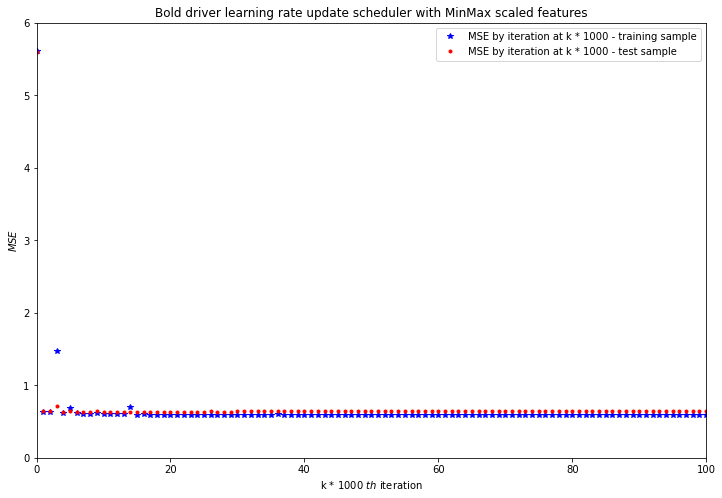

In [87]:
## Subtask 6:  Implement Least Squares Linear Regression on Your Own IV


scalerX = MinMaxScaler()
scalerX.fit(X)

x_train_scaled = scalerX.transform(x_train)
x_test_scaled = scalerX.transform(x_test)

trainLosses, trainMSEs, testMSEs, trainWs, k = GD2(x_train_scaled, y_train, x_test_scaled, y_test, numIterations = 100000)  

plt.figure(figsize=(12,8))
plt.plot(k, trainMSEs, '*', c = 'b', label = 'MSE by iteration at k * 1000 - training sample')
plt.plot(k, testMSEs, '.', c = 'r', label = 'MSE by iteration at k * 1000 - test sample')


plt.xlabel('k * 1000 $th$ iteration')
plt.ylabel('$MSE$')
plt.xlim((0, 100))
plt.ylim((0,6))
plt.title('Bold driver learning rate update scheduler with MinMax scaled features')
plt.legend()

print('Bold driver like gradient descent\'s regression with MinMax scaled features mean squared error on train data: ', 
      trainMSEs[-1])
print('Bold driver like  gradient descent\'s regression with MinMax scaled features mean squared error on test data: ', 
      testMSEs[-1])


In [101]:
# Subtask  7:  Least  Squares  Linear  Regression  Using  Higher-order  Features

# Scaling data
scalerX = MinMaxScaler()
scalerX.fit(X)

x_train_scaled = scalerX.transform(x_train)
x_test_scaled = scalerX.transform(x_test)

#x_train_scaled = (x_train)
#x_test_scaled = (x_test)


# Poly
for i in [1, 2,3,4]:
    poly = preprocessing.PolynomialFeatures(degree = i, include_bias= False)
    poly.fit(x_train_scaled)
    
    x_train_scaled_poly = poly.transform(x_train_scaled)
    x_test_scaled_poly = poly.transform(x_test_scaled)
    
    
    #print(x_train_scaled_poly.shape)
    #print(x_test_scaled_poly.shape)

    model_reg = linear_model.LinearRegression(fit_intercept = False)
    model_reg.fit(x_train_scaled_poly, y_train)

    y_hat_trainPoly = model_reg.predict(x_train_scaled_poly)
    y_hat_testPoly = model_reg.predict(x_test_scaled_poly)
    
    test_poly = metrics.mean_squared_error(y_test, y_hat_testPoly, squared=True)
    train_poly = metrics.mean_squared_error(y_train, y_hat_trainPoly, squared=True)

    print('At polynomial level ',i, 'MSE on training data: ', train_poly)
    print('At polynomial level ',i, 'MSE on test data: ', test_poly)


(14448, 8)
(6192, 8)
At polynomial level  1 MSE on training data:  0.5906940287969901
At polynomial level  1 MSE on test data:  0.6464752155710056
(14448, 44)
(6192, 44)
At polynomial level  2 MSE on training data:  0.4112100632957337
At polynomial level  2 MSE on test data:  189.4389278074302
(14448, 164)
(6192, 164)
At polynomial level  3 MSE on training data:  0.3367652855181704
At polynomial level  3 MSE on test data:  13548004.708376527
(14448, 494)
(6192, 494)
At polynomial level  4 MSE on training data:  0.2762800964498828
At polynomial level  4 MSE on test data:  10117936906002.094
